In [46]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Đọc tập dữ liệu thông tin của các film
data_movies = pd.read_csv('movies.csv')

#Hiển thị thông tin tập dữ liệu
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [47]:
#Hiển thị dữ liệu 5 dòng đầu tiên
data_movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [48]:
data = data_movies[['original_title','overview','release_date','vote_average','vote_count']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  4803 non-null   object 
 1   overview        4800 non-null   object 
 2   release_date    4802 non-null   object 
 3   vote_average    4803 non-null   float64
 4   vote_count      4803 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 187.7+ KB


In [49]:
#Thống kê số liệu missing trong Data frame
#Theo từng cột
print('Số lượng missing data trong file dữ liệu:')
print(data.isnull().sum())

Số lượng missing data trong file dữ liệu:
original_title    0
overview          3
release_date      1
vote_average      0
vote_count        0
dtype: int64


In [50]:
#Liệt kê các bộ phim có thuộc tính tóm tắt là rỗng:
data[data['overview'].isnull()==True]

,original_title,overview,release_date,vote_average,vote_count
2656,Chiamatemi Francesco - Il Papa della gente,NaN,2015-12-03,7.3,12
4140,"To Be Frank, Sinatra at 100",NaN,2015-12-12,0.0,0
4431,Food Chains,NaN,2014-04-26,7.4,8


In [51]:
#Xóa tất cả các bộ film có chứa thuộc tính null
data.dropna(axis=0,how='any',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  4799 non-null   object 
 1   overview        4799 non-null   object 
 2   release_date    4799 non-null   object 
 3   vote_average    4799 non-null   float64
 4   vote_count      4799 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 225.0+ KB


In [52]:
#Sắp xếp lại dữ liệu theo ngày phát hành
data.sort_values('release_date',axis=0,inplace=True)
data.head()

,original_title,overview,release_date,vote_average,vote_count
4592,Intolerance,"The story of a poor young woman, separated by ...",1916-09-04,7.4,60
4661,The Big Parade,The story of an idle rich boy who joins the US...,1925-11-05,7.0,21
2638,Metropolis,In a futuristic city sharply divided between t...,1927-01-10,8.0,657
4457,Die Büchse der Pandora,The rise and inevitable fall of an amoral but ...,1929-01-30,7.6,45
4594,The Broadway Melody,"Harriet and Queenie Mahoney, a vaudeville act,...",1929-02-08,5.0,19


In [53]:
#Thống kê các bộ film trùng tên trong tập dữ liệu
data['original_title'].value_counts()

original_title
Batman                    2
Out of the Blue           2
Intolerance               1
Terminator Salvation      1
Crying with Laughter      1
                         ..
Glitter                   1
Ayurveda: Art of Being    1
The Glass House           1
Hardball                  1
Growing Up Smith          1
Name: count, Length: 4797, dtype: int64

In [54]:
#Sắp xếp film theo thuộc tính vote_count và xóa các film trùng tên, 
#giữ lại film có lượt vote lớn hơn
data.sort_values('vote_count',ascending=True,inplace=True)
data.drop_duplicates(['original_title'],keep='last',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4797 entries, 4684 to 96
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  4797 non-null   object 
 1   overview        4797 non-null   object 
 2   release_date    4797 non-null   object 
 3   vote_average    4797 non-null   float64
 4   vote_count      4797 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 224.9+ KB


In [55]:
#Thống kê các bộ film trùng tên trong tập dữ liệu sau xử lý
data['original_title'].value_counts()

original_title
Solitude                    1
Super Size Me               1
Haywire                     1
Footloose                   1
Barry Lyndon                1
                           ..
Howards End                 1
All the King's Men          1
Showdown in Little Tokyo    1
Down to Earth               1
Inception                   1
Name: count, Length: 4797, dtype: int64

In [56]:
#Thống kê các dữ liệu trùng nhau
data['overview'].value_counts()

overview
After finding an old storage locker filled with his family's history, James Erikson begins a journey to discover the truth behind a mysterious piece of land in the small town of Solitude.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      1
Morgan Spurlock subjects himself to a diet based only on McDonald's fast food three times a day for thirty days without exer

In [57]:
#Lưu dữ liệu ra file Data_Movies.csv
data.sort_values(['release_date'],inplace=True)
data.reset_index(drop=True,inplace=True)
data.to_csv('Data_Movies.csv',index=None)

In [58]:
# Đọc dữ liệu đã chuẩn hóa:
data = pd.read_csv('Data_Movies.csv')
data

,original_title,overview,release_date,vote_average,vote_count
0,Intolerance,"The story of a poor young woman, separated by ...",1916-09-04,7.4,60
1,The Big Parade,The story of an idle rich boy who joins the US...,1925-11-05,7.0,21
2,Metropolis,In a futuristic city sharply divided between t...,1927-01-10,8.0,657
3,Die Büchse der Pandora,The rise and inevitable fall of an amoral but ...,1929-01-30,7.6,45
4,The Broadway Melody,"Harriet and Queenie Mahoney, a vaudeville act,...",1929-02-08,5.0,19
...,...,...,...,...,...
4792,Kicks,When his hard-earned kicks get snatched by a l...,2016-09-09,7.5,18
4793,The Birth of a Nation,"Nat Turner, a former slave in America, leads a...",2016-09-09,6.5,178
4794,Mr. Church,A unique friendship develops when a little gir...,2016-09-16,7.0,129
4795,Two Lovers and a Bear,Set in a small town near the North Pole where ...,2016-10-02,6.8,27


In [59]:
#Sắp xếp lại dữ liệu theo vote_count giảm dần:
movies_View=data.copy().sort_values('vote_count',ascending=False)

#Lấy 10 film có số lượt xem cao nhất:
list10_vote_count = movies_View[['original_title','vote_count','vote_average']].head(10).copy()
list10_vote_count.reset_index(drop = True, inplace=True)
print('TOP 10 BỘ FILM CÓ SỐ LƯỢNG XEM CAO NHẤT')
list10_vote_count

TOP 10 BỘ FILM CÓ SỐ LƯỢNG XEM CAO NHẤT


,original_title,vote_count,vote_average
0,Inception,13752,8.1
1,The Dark Knight,12002,8.2
2,Avatar,11800,7.2
3,The Avengers,11776,7.4
4,Deadpool,10995,7.4
5,Interstellar,10867,8.1
6,Django Unchained,10099,7.8
7,Guardians of the Galaxy,9742,7.9
8,The Hunger Games,9455,6.9
9,Mad Max: Fury Road,9427,7.2


In [60]:
#Sử dụng phương pháp TF-IDF cho bài toán
#Xây dựng ma trận TF-IDF cho thuộc tính tóm tắt phim (Overview)
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['overview'])

# ma trận corpus của TFIDF
tfidf_matrix.shape

(4797, 21250)

In [61]:
#Tính độ tương tự cosine giữa các bộ film với nhau dựa vào 
#tóm tắt film ở dạng số
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
print('Kích thước ma trận tương đồng:', cosine_sim.shape)
print(cosine_sim)

Kích thước ma trận tương đồng: (4797, 4797)
[[1.         0.05305989 0.02431297 ... 0.01234444 0.02714074 0.02804599]
 [0.05305989 1.         0.16819173 ... 0.02922449 0.06029095 0.08800656]
 [0.02431297 0.16819173 1.         ... 0.00177206 0.03098544 0.04909468]
 ...
 [0.01234444 0.02922449 0.00177206 ... 1.         0.0042249  0.02264556]
 [0.02714074 0.06029095 0.03098544 ... 0.0042249  1.         0.01984964]
 [0.02804599 0.08800656 0.04909468 ... 0.02264556 0.01984964 1.        ]]


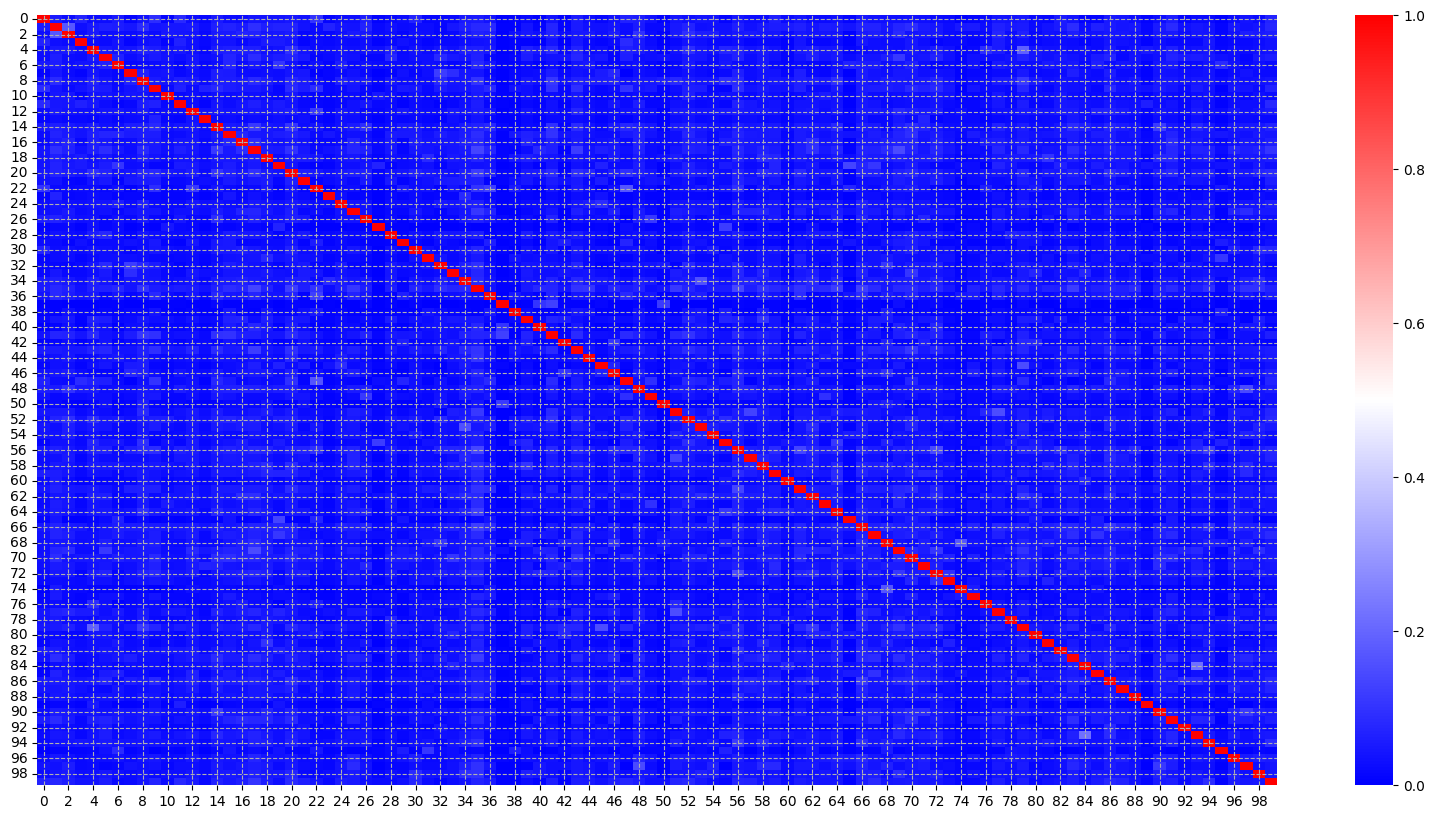

In [62]:
#Trực quan hóa độ tương đồng của 100 bộ phim đầu tiên với nhau:
plt.figure(figsize=(20,10))

ax = sns.heatmap(cosine_sim[0:100,0:100],
                 cmap='bwr' )
plt.grid(ls='--')
plt.show()


In [63]:
#Tạo một biến Series Lấy danh sách tên các bộ film 
#và index tương ứng
indices = pd.Series(data.index,index=data['original_title'])
indices

original_title
Intolerance                  0
The Big Parade               1
Metropolis                   2
Die Büchse der Pandora       3
The Broadway Melody          4
                          ... 
Kicks                     4792
The Birth of a Nation     4793
Mr. Church                4794
Two Lovers and a Bear     4795
Growing Up Smith          4796
Length: 4797, dtype: int64

In [67]:
def get_recommend_movies(title,cosine_sim=cosine_sim):
    #Lấy index của bộ film theo tiêu đề đưa vào
    idx=indices[title]
    
    #Lấy điểm tương đồng theo cặp của tất cả các movies theo tiêu đề bộ film đưa vào
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sắp xếp các bộ film dựa theo điểm tương đồng giảm dần
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    #Lấy điểm của 8 bộ film có độ tương đồng cao nhất
    #Và bao gồm cả bộ phim đưa vào 
    sim_scores_8 = sim_scores[0:9]
    
    #Lấy index tương ứng với bộ film này:
    movies_index = [i[0] for i in sim_scores_8]
    
    #Xóa index của bộ phim đầu vào khỏi danh sách kết quả:
    movies_index.remove(idx)
    
    #trả ra tiêu đề và tóm tắt của 8 bộ film ứng với index
    return data[['original_title','overview','release_date']].iloc[movies_index]
#Thử đề xuất với tên bộ film bất kỳ
#1. Bộ film: Batman Forever
get_recommend_movies('The Dark Knight')

,original_title,overview,release_date
3905,The Dark Knight Rises,Following the death of District Attorney Harve...,2012-07-16
598,Batman Returns,"Having defeated the Joker, Batman now faces th...",1992-06-19
4023,"Batman: The Dark Knight Returns, Part 2",Batman has stopped the reign of terror that Th...,2013-01-18
744,Batman Forever,The Dark Knight of Gotham City confronts a das...,1995-05-31
507,Batman,The Dark Knight of Gotham City begins his war ...,1989-06-23
2321,Batman Begins,"Driven by tragedy, billionaire Bruce Wayne ded...",2005-06-10
1708,The Rookie,Jim Morris never made it out of the minor leag...,2002-03-25
2326,Land of the Dead,The world is full of zombies and the survivors...,2005-06-24


In [68]:
#Thử đề xuất với tên bộ film bất kỳ
#2. Bộ film: Star Wars
get_recommend_movies('Deadpool')

,original_title,overview,release_date
4716,Midnight Special,A father and son go on the run after the dad l...,2016-02-18
2461,Underworld: Evolution,As the war between the vampires and the Lycans...,2006-01-12
2123,Ночной дозор,"Among normal humans live the ""Others"" possessi...",2004-06-27
1377,Shaft,New York police detective John Shaft arrests W...,2000-06-15
2491,The Shaggy Dog,The tale of a workaholic dad-turned-dog who fi...,2006-03-09
3894,The Amazing Spider-Man,Peter Parker is an outcast high schooler aband...,2012-06-27
2121,Spider-Man 2,Peter Parker is going through a major identity...,2004-06-25
698,Men of War,"Nick Gunar is a burnt-out, jaded and hard-up f...",1994-09-04
